In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
#import matplotlib inline

In [6]:
iris = datasets.load_iris()

In [7]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [8]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# colormap = np.array(['red', 'lime', 'black'])# 
# K Means Cluster

In [9]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#  This is what KMeans thought

In [11]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# View the results
# Set the size of the plot

In [12]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

# Create a colormap

In [13]:
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications

Text(0.5, 1.0, 'Real Classification')

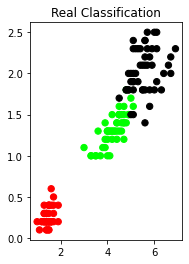

In [14]:
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

# Plot the Models Classifications

Text(0.5, 1.0, 'K Mean Classification')

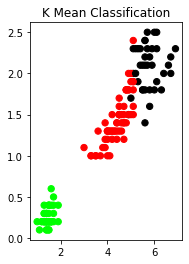

In [15]:
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

# View the results
# Set the size of the plot

In [16]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [17]:
# Create a colormap
#print('The accuracy score : ',sm.accuracy_score(y, model.labels_))
#sm.confusion_matrix(y, model.labels_)
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# colormap = np.array(['red', 'lime', 'black'])
# Plot Orginal

Text(0.5, 1.0, 'Real Classification')

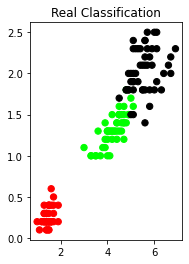

In [18]:
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

#  Plot Predicted with corrected values

Text(0.5, 1.0, 'K Mean Classification')

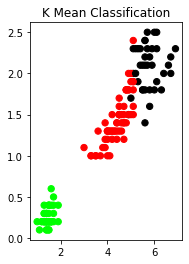

In [19]:
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [20]:
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
y_cluster_gmm = gmm.predict(xs)
#y_cluster_gmm

Text(0.5, 1.0, 'GMM Classification')

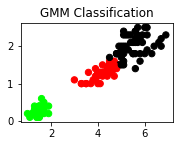

In [24]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

In [25]:
print('The accuracy score of EM: ',sm.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_cluster_gmm))

The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]
